<a href="https://colab.research.google.com/github/Daysiday/Daysiday/blob/main/Modulo1_Preprosesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREPROCESAMIENTO DE IMAGENES**

Preparando el entorno de trabajo

Software requerido


*   Python


Con las siguientes bibliotecas:


*   pylab
*   numpy
*   scipy
*   matplotlib


Primero instalamos las librerias necesarias:

In [ ]:
!pip install matplotlib numpy

Luego importamos las librerias que vamos a Utilizar:


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from skimage.data import camera
rcParams['image.cmap'] = 'gray'



Comenzaremos por cargar una imagen simple para mostar varios ejemplos.

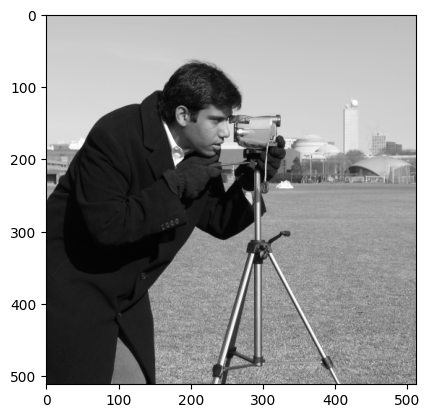

In [ ]:
image = camera() / 255 # escalar valores entre 0 y 1

imshow(image)


# **Convolucion 2D de imagenes con Python**

Ahora vamos a definir el núcleo de convolución

In [ ]:
kernel = full((3,3), 1/9) # Filtro promedio

print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Ahora obtendremos la imagen pixelada haciendo un recorrido sobre ella con un salto de 10

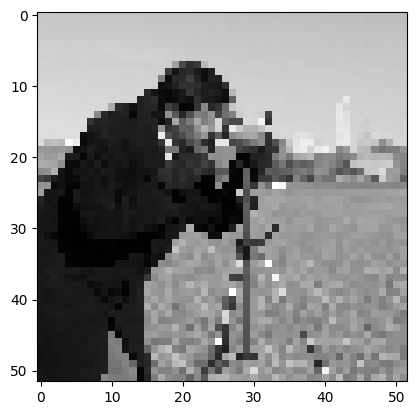

In [ ]:
pixelated = image[::10, ::10]

imshow(pixelated)

Utilizaremos la siguiente función utilitaria para mostrar varias imágenes

In [ ]:
from skimage import img_as_float

def imshow_all(*images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax)
        ax.set_title(label)

Probando la función

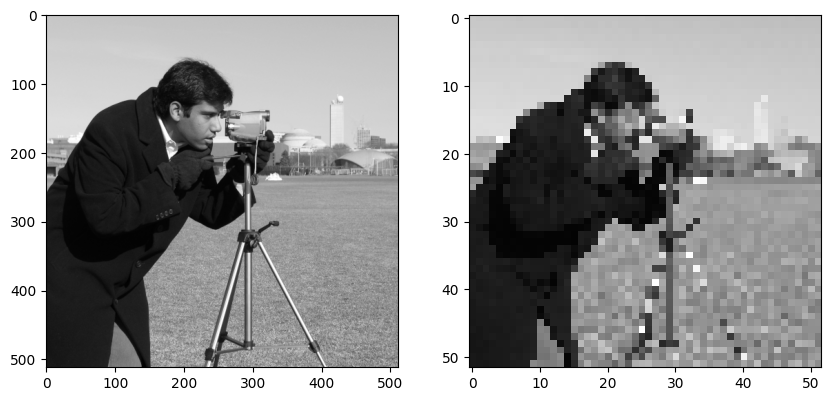

In [ ]:
imshow_all(image, pixelated)

Para aplicar la convolución utilizaremos la función convolve que se encuentra en el módulo ndimage de la biblioteca scipy

In [ ]:
from scipy.ndimage import convolve as conv2 # Convolución 2D

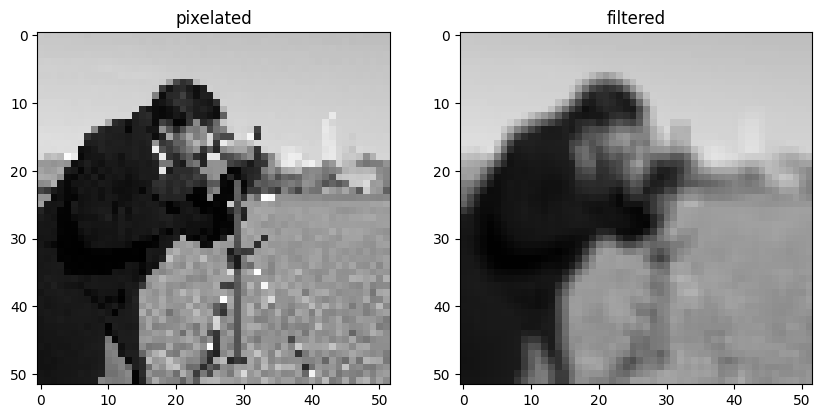

In [ ]:
filtered = conv2(pixelated, kernel)

imshow_all(pixelated, filtered, titles=['pixelated', 'filtered'])

Podemos observar como se produce un suavizado en la imagen, debido a que los pixeles oscuros reducen su intensidad debido a los pixeles vecinos y viceversa.

La operación de correlación se realiza de manera similar pero utilizando la función correlate

In [ ]:
from scipy.ndimage import correlate as corr2

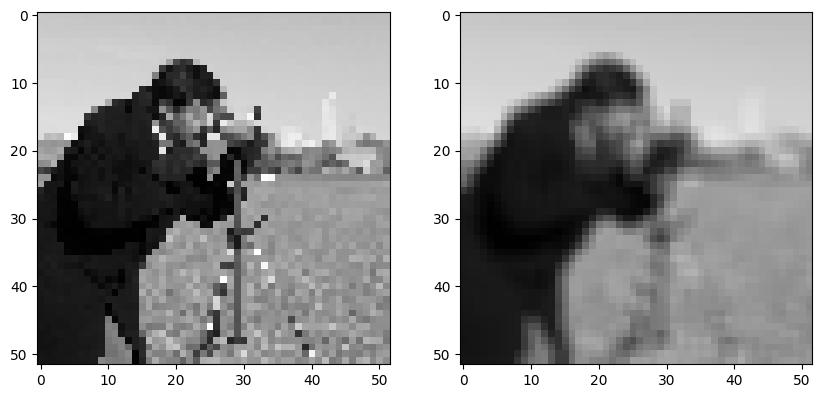

In [ ]:
filtered2 = corr2(pixelated, kernel)

imshow_all(pixelated, filtered2)

# **Operaciones Básicas en el Preprocesamiento de Imágenes**

**1️⃣ Inversión de Imagen (Negativo)**


La inversión de una imagen consiste en cambiar los valores de los píxeles, de modo que las áreas claras se vuelvan oscuras y viceversa. Matemáticamente:

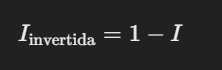


si la imagen está normalizada entre 0 y 1.

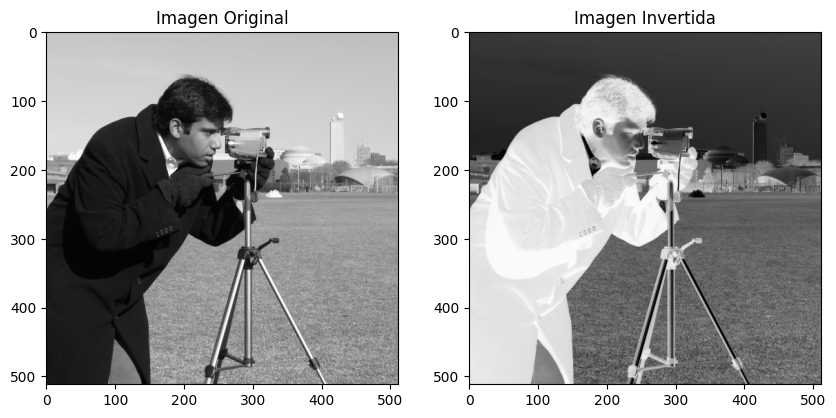

In [ ]:
# Cargar imagen normalizada
image = camera() / 255.0

# Invertir la imagen
image_inverted = 1 - image

# Mostrar resultados
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Imagen Original")
ax[1].imshow(image_inverted, cmap='gray')
ax[1].set_title("Imagen Invertida")
plt.show()

**Operaciones Aritméticas (Suma, Resta, Multiplicación, División)**

Concepto:

Las operaciones aritméticas permiten combinar imágenes o modificar su brillo/contraste. Algunas fórmulas básicas:

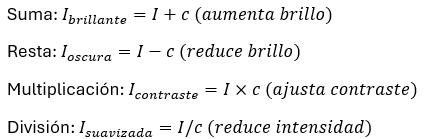

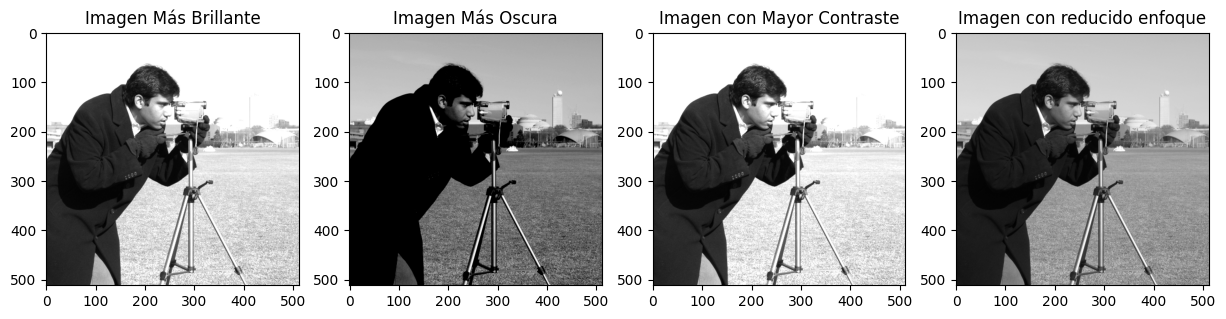

In [ ]:
# Aumentar brillo
image_bright = np.clip(image + 0.3, 0, 1)

# Reducir brillo
image_dark = np.clip(image - 0.3, 0, 1)

# Aumentar contraste
image_contrast = np.clip(image * 1.5, 0, 1)

# Reducir intensidad
image_reduce = np.clip(image/1.5, 0, 1)

# Mostrar resultados
fig, ax = plt.subplots(1, 4, figsize=(15,5))
ax[0].imshow(image_bright, cmap='gray')
ax[0].set_title("Imagen Más Brillante")
ax[1].imshow(image_dark, cmap='gray')
ax[1].set_title("Imagen Más Oscura")
ax[2].imshow(image_contrast, cmap='gray')
ax[2].set_title("Imagen con Mayor Contraste")
ax[3].imshow(image_reduce, cmap='gray')
ax[3].set_title("Imagen con reducido enfoque")
plt.show()

✏️ Explicación:

Se usa np.clip() para evitar valores fuera de rango (0-1).

Se suma, resta y multiplica la imagen para modificar brillo y contraste.

**3️⃣ Operaciones Lógicas (AND, OR, XOR)**



Las operaciones lógicas se usan en imágenes binarias para combinarlas de diferentes maneras:


AND: Intersección de píxeles blancos en ambas imágenes.

OR: Unión de píxeles blancos de ambas imágenes.

XOR: Píxeles diferentes en cada imagen.


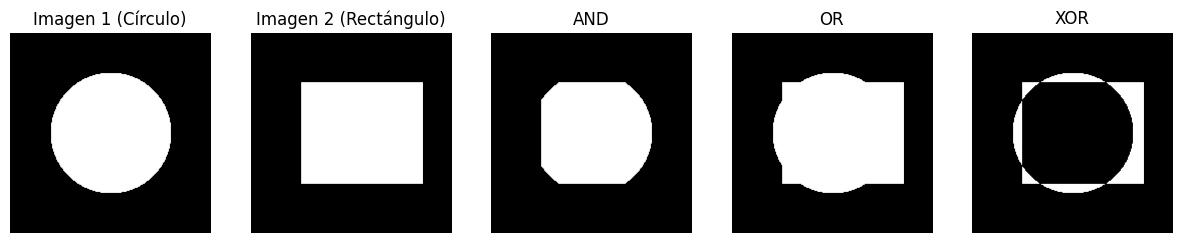

In [ ]:
from skimage.draw import disk, rectangle

# Crear una imagen binaria con un círculo
image1 = np.zeros((200, 200), dtype=np.uint8)
rr, cc = disk((100, 100), 60)  # Centro (100,100) y radio 60
image1[rr, cc] = 1  # Dibujar el círculo

# Crear una imagen binaria con un rectángulo
image2 = np.zeros((200, 200), dtype=np.uint8)
rr, cc = rectangle(start=(50, 50), end=(150, 170))
image2[rr, cc] = 1  # Dibujar el rectángulo

# Aplicar operaciones lógicas
image_and = image1 & image2
image_or = image1 | image2
image_xor = image1 ^ image2

# Mostrar resultados
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
ax[0].imshow(image1, cmap='gray')
ax[0].set_title("Imagen 1 (Círculo)")
ax[1].imshow(image2, cmap='gray')
ax[1].set_title("Imagen 2 (Rectángulo)")
ax[2].imshow(image_and, cmap='gray')
ax[2].set_title("AND")
ax[3].imshow(image_or, cmap='gray')
ax[3].set_title("OR")
ax[4].imshow(image_xor, cmap='gray')
ax[4].set_title("XOR")

for a in ax:
    a.axis("off")

plt.show()


**✏️ Explicación**

🔹 Imagen 1: Contiene un círculo blanco sobre fondo negro.

🔹 Imagen 2: Contiene un rectángulo blanco sobre fondo negro.

🔹 AND: Muestra solo la intersección (donde ambos son blancos).

🔹 OR: Muestra la unión de ambas figuras (cualquier parte blanca en al menos una de las imágenes).

🔹 XOR: Muestra las regiones donde solo una de las dos imágenes tiene un píxel blanco.

**4️⃣ Umbralización**

Concepto:

La umbralización separa los píxeles en dos clases:

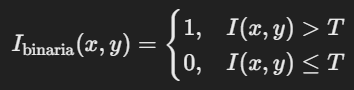

Donde:

T es un umbral fijo o adaptativo.

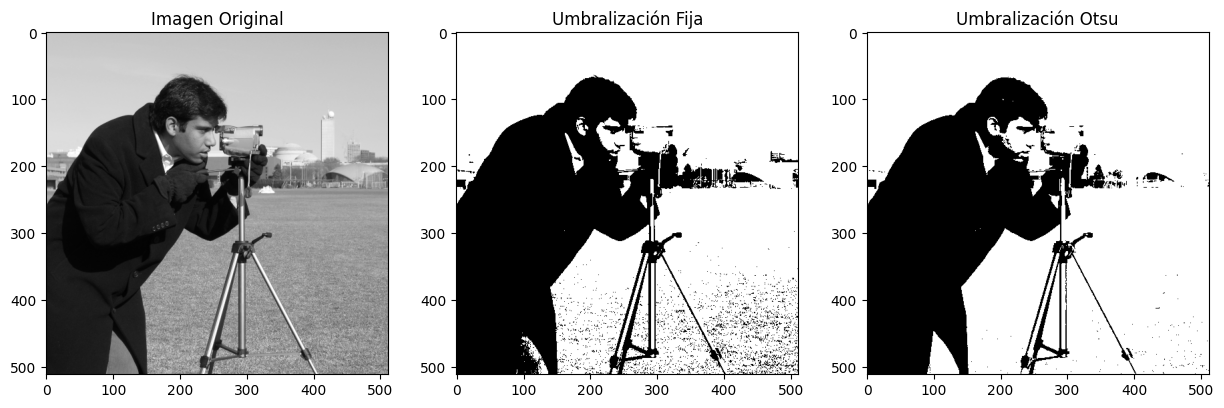

In [ ]:
from skimage.filters import threshold_otsu

# Binarizar imagen con umbral de Otsu
thresh = threshold_otsu(image)

# Umbralización con valor fijo
T = 0.5

binary_fixed = image > T

# Umbralización automática con Otsu
binary_otsu = image > threshold_otsu(image)

# Mostrar resultados
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Imagen Original")
ax[1].imshow(binary_fixed, cmap='gray')
ax[1].set_title("Umbralización Fija")
ax[2].imshow(binary_otsu, cmap='gray')
ax[2].set_title("Umbralización Otsu")
plt.show()


✏️ Explicación:


Se compara la imagen con un umbral fijo (0.5).

Se usa Otsu para calcular el mejor umbral de forma automática.


**5️⃣ Binarización**

Concepto:

La binarización es una umbralización estricta donde los píxeles quedan solo en dos valores: 0 (negro) o 1 (blanco).



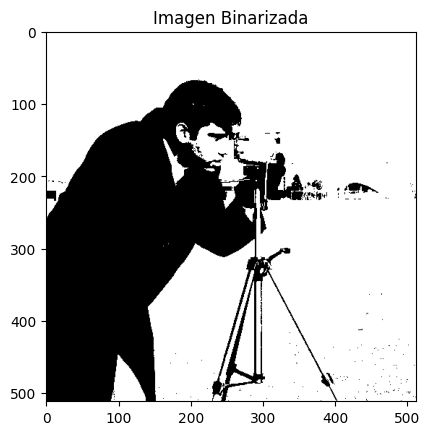

In [ ]:
# Convertir imagen a binaria (0 o 1)
binary_image = (image > threshold_otsu(image)).astype(np.uint8)

# Mostrar resultado
plt.imshow(binary_image, cmap='gray')
plt.title("Imagen Binarizada")
plt.show()


✏️ Explicación:


Se obtiene una imagen binaria en valores de 0 y 1.

Se usa astype(np.uint8) para normalizar la salida.

### **🔹 Conclusión**
🔹 Estas operaciones son esenciales en preprocesamiento de imágenes.

🔹 Se pueden usar antes de alimentar imágenes a modelos de Machine Learning.

🔹 En los siguientes pasos aplicaremos transformaciones geométricas y filtros.

# **📌 Transformaciones Geométricas en Imágenes**

Las transformaciones geométricas permiten modificar la posición, orientación, tamaño y forma de una imagen. Son esenciales en visión artificial y Machine Learning para aumentar datos y mejorar la robustez de modelos.

**1️⃣ Traslación**

La traslación desplaza la imagen en el eje X y/o Y sin modificar su forma. Se usa una matriz de transformación:

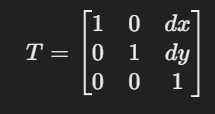

donde dx y dy son los desplazamientos en los ejes X e Y.




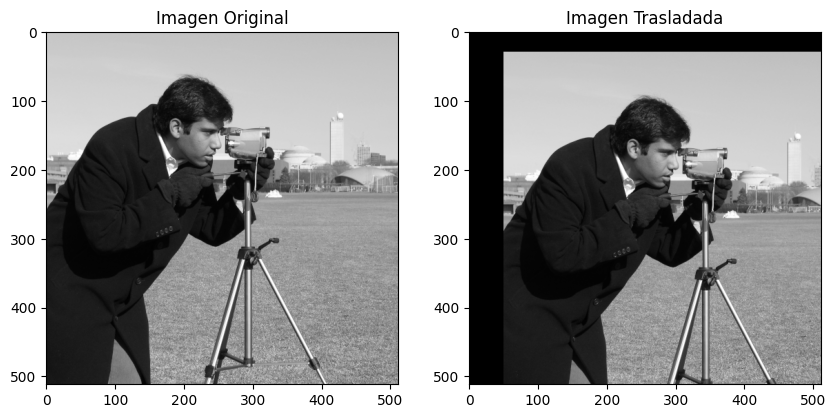

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import camera
from skimage.transform import AffineTransform, warp

# Cargar imagen
image = camera()

# Crear matriz de traslación
tform = AffineTransform(translation=(50, 30))  # Desplazar 50px en X y 30px en Y
image_translated = warp(image, tform.inverse)

# Mostrar resultados
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Imagen Original")
ax[1].imshow(image_translated, cmap='gray')
ax[1].set_title("Imagen Trasladada")
plt.show()


✏️ Explicación:

Se aplica una traslación de 50 px en X y 30 px en Y.

warp() transforma la imagen con la matriz de traslación inversa.

**2️⃣ Rotación**

La rotación gira la imagen en un ángulo 𝜃 alrededor del centro usando la matriz:

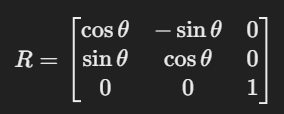

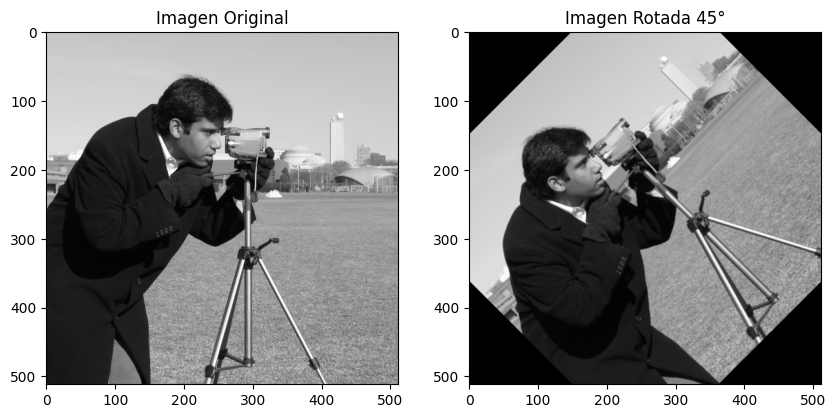

In [ ]:
from skimage.transform import rotate

# Rotar la imagen 45 grados
image_rotated = rotate(image, angle=45)

# Mostrar resultados
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Imagen Original")
ax[1].imshow(image_rotated, cmap='gray')
ax[1].set_title("Imagen Rotada 45°")
plt.show()


✏️ Explicación:


Se rota la imagen 45 grados con rotate().

**3️⃣ Escalado**
El escalado cambia el tamaño de la imagen según un factor sx, sy:

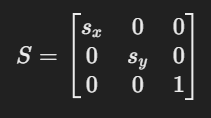




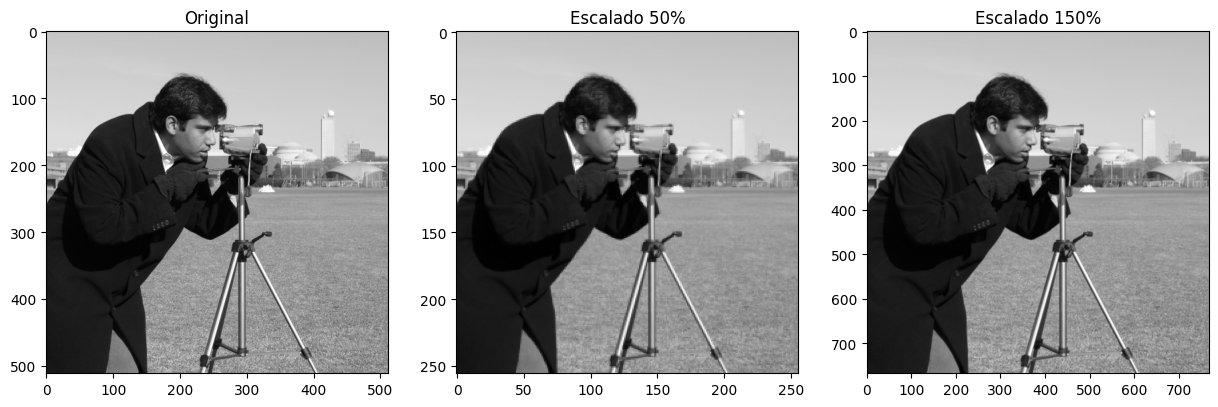

In [ ]:
from skimage.transform import rescale

# Escalar imagen al 50% y al 150%
image_small = rescale(image, scale=0.5, anti_aliasing=True)
image_large = rescale(image, scale=1.5, anti_aliasing=True)

# Mostrar resultados
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(image_small, cmap='gray')
ax[1].set_title("Escalado 50%")
ax[2].imshow(image_large, cmap='gray')
ax[2].set_title("Escalado 150%")
plt.show()


✏️ Explicación:

Se reduce la imagen a 50% y se amplía a 150%.

anti_aliasing=True suaviza bordes al escalar.

**4️⃣ Espejo (Reflexión Horizontal y Vertical)**

Se refleja la imagen respecto a los ejes X o Y intercambiando los píxeles.


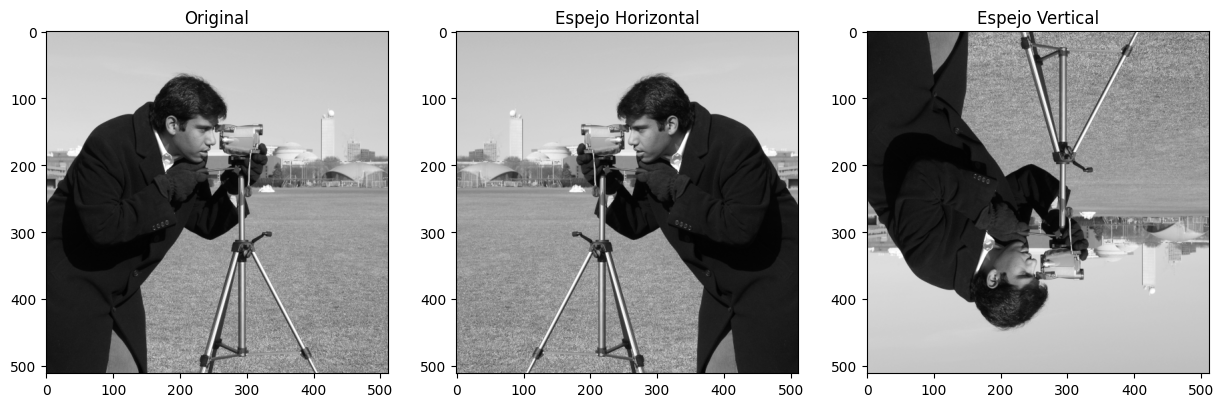

In [ ]:
import cv2

# Reflejar imagen horizontalmente
image_flipped_h = np.fliplr(image)

# Reflejar imagen verticalmente
image_flipped_v = np.flipud(image)

# Mostrar resultados
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(image_flipped_h, cmap='gray')
ax[1].set_title("Espejo Horizontal")
ax[2].imshow(image_flipped_v, cmap='gray')
ax[2].set_title("Espejo Vertical")
plt.show()


✏️ Explicación:

*  np.fliplr() invierte horizontalmente.


*  np.flipud() invierte verticalmente.

**5️⃣ Reducción de Resolución (Submuestreo)**

Reducir la resolución disminuye la cantidad de píxeles en la imagen, afectando su calidad y nivel de detalle.


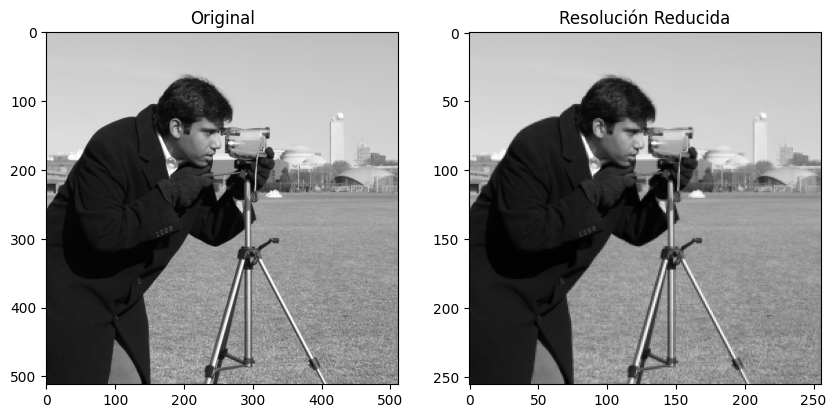

In [ ]:
from skimage.transform import downscale_local_mean

# Reducir resolución a la mitad
image_lowres = downscale_local_mean(image, (2,2))

# Mostrar resultados
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(image_lowres, cmap='gray')
ax[1].set_title("Resolución Reducida")
plt.show()


✏️ Explicación:


Se usa downscale_local_mean() para reducir el tamaño sin distorsión.

Cada bloque de 2x2 píxeles se reemplaza por su media.

**6️⃣ Deformación (Transformación Afín No Lineal)**

Cambia la forma de la imagen aplicando desplazamientos no uniformes en los píxeles.

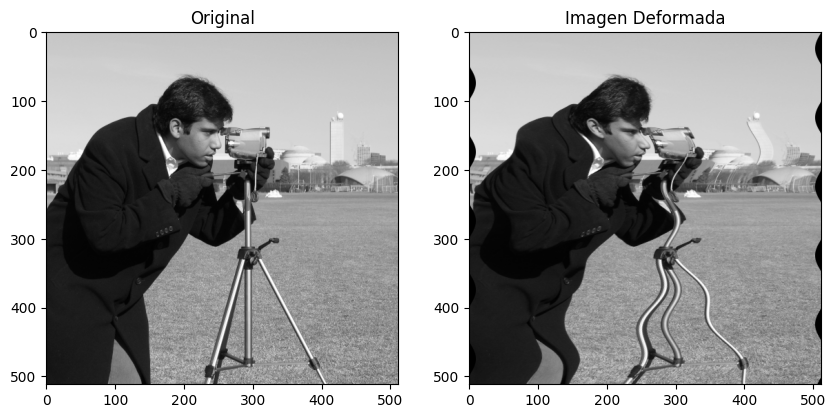

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import warp
from skimage import data

# Cargar una imagen de ejemplo (puedes reemplazar esto con tu propia imagen)
image = data.camera()

# Crear transformación de deformación
def warp_function(coords):
    # coords es un array de forma (rows, cols, 2)
    # coords[..., 0] son las coordenadas x, coords[..., 1] son las coordenadas y
    coords_x = coords[..., 0] + 10 * np.sin(2 * np.pi * coords[..., 1] / 100)  # Deformación en x
    coords_y = coords[..., 1]  # Sin deformación en y
    return np.stack([coords_x, coords_y], axis=-1)  # Devolver un array de forma (rows, cols, 2)

# Aplicar deformación
image_warped = warp(image, warp_function)

# Mostrar resultados
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(image_warped, cmap='gray')
ax[1].set_title("Imagen Deformada")
plt.show()

✏️ Explicación:


Se usa warp() con una función personalizada que distorsiona la imagen.

Se genera una onda sinusoidal en la dirección X.


**🔹 Conclusión**

✅ Las transformaciones geométricas son claves en preprocesamiento de imágenes y aumento de datos en IA.

✅ Permiten modificar la imagen sin perder información relevante.

✅ Se usan en reconocimiento facial, visión robótica y aprendizaje profundo.

# **📌 Generación de Ruido en Imágenes**

El ruido en imágenes se refiere a variaciones aleatorias en la intensidad de los píxeles, que pueden afectar el análisis y la calidad de la imagen. Se divide en ruido dependiente de la señal y ruido aleatorio.

**1️⃣ Ruido Dependiente de la Señal**

Este tipo de ruido está relacionado con la intensidad de los píxeles y suele aparecer en imágenes capturadas en condiciones de poca luz o con sensores defectuosos. Algunos ejemplos son:

* Ruido de Poisson: Aparece en imágenes con exposición variable (fotografía de baja luz).

* Ruido Speckle: Común en imágenes de radar y médicas.






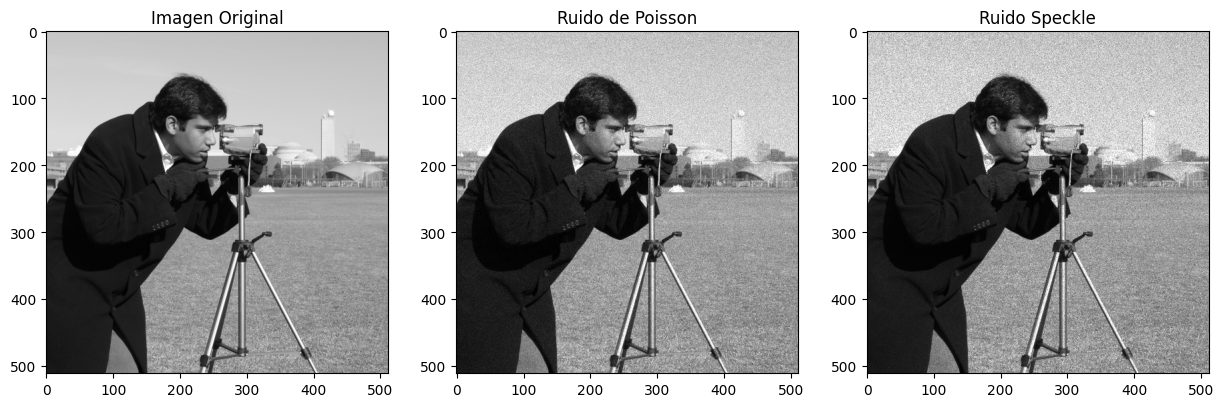

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.data import camera

# Cargar imagen de ejemplo
image = camera() / 255.0  # Normalizar entre 0 y 1

# Agregar Ruido de Poisson
image_poisson = random_noise(image, mode='poisson')

# Agregar Ruido Speckle
image_speckle = random_noise(image, mode='speckle')

# Mostrar imágenes
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Imagen Original")
ax[1].imshow(image_poisson, cmap='gray')
ax[1].set_title("Ruido de Poisson")
ax[2].imshow(image_speckle, cmap='gray')
ax[2].set_title("Ruido Speckle")
plt.show()


✏️ Explicación:

random_noise(image, mode='poisson') agrega ruido Poisson dependiente de la intensidad de los píxeles.

random_noise(image, mode='speckle') multiplica la imagen por un ruido aleatorio, simulando interferencias en imágenes médicas y satelitales.

**2️⃣ Ruido Aleatorio**

El ruido aleatorio no depende de la señal original y se genera de forma uniforme en toda la imagen. Ejemplos:

* Ruido Gaussiano: Se modela como una distribución normal, común en cámaras digitales.

* Ruido Sal y Pimienta: Introduce píxeles negros y blancos dispersos al azar.

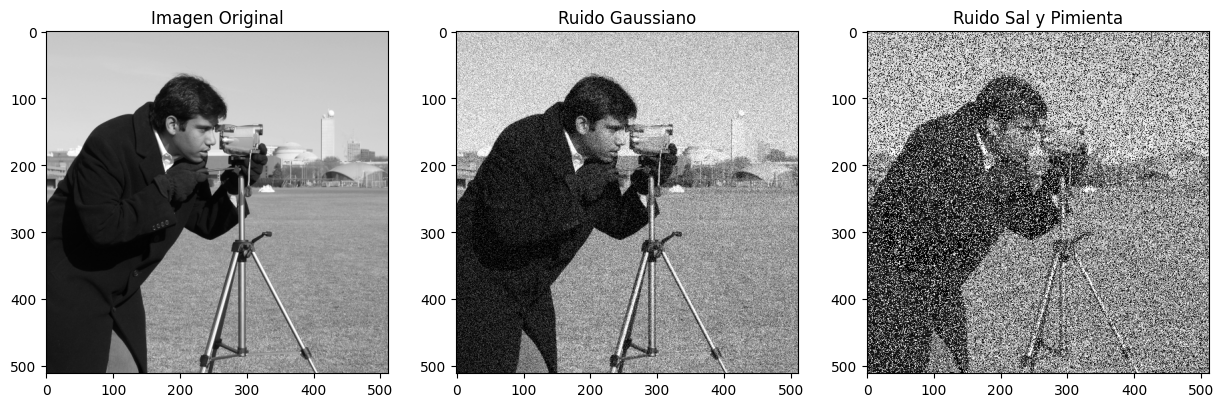

In [ ]:
# Agregar Ruido Gaussiano al 1
image_gaussian = random_noise(image, mode='gaussian', var=0.01)

# Agregar Ruido Sal y Pimienta al 40% de la imagen
image_salt_pepper = random_noise(image, mode='s&p', amount=0.4)

# Mostrar imágenes
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Imagen Original")
ax[1].imshow(image_gaussian, cmap='gray')
ax[1].set_title("Ruido Gaussiano")
ax[2].imshow(image_salt_pepper, cmap='gray')
ax[2].set_title("Ruido Sal y Pimienta")
plt.show()


✏️ Explicación:

random_noise(image, mode='gaussian', var=0.01) agrega ruido con una distribución normal.

random_noise(image, mode='s&p', amount=0.4) introduce píxeles negros y blancos aleatorios (40% de la imagen).

**🔹 Conclusión**

✅ El ruido en imágenes es crucial en visión artificial para entrenar modelos resistentes a variaciones en las condiciones de captura.

✅ Ruido dependiente de la señal afecta regiones específicas, mientras que ruido aleatorio se distribuye uniformemente.

✅ Se puede aplicar preprocesamiento para reducir ruido antes del análisis.

# **📌 Filtros en Imágenes**


Los filtros se aplican para modificar los valores de los píxeles de una imagen con base en sus vecinos. Se dividen en simples, convolucionales y basados en histogramas.

**1️⃣ Filtros Simples**


Los filtros simples realizan operaciones básicas sobre los píxeles de una imagen. Algunos ejemplos son:

* Filtro de media: Suaviza la imagen reduciendo el ruido.
* Filtro de mediana: Elimina ruido sal y pimienta manteniendo los bordes nítidos.


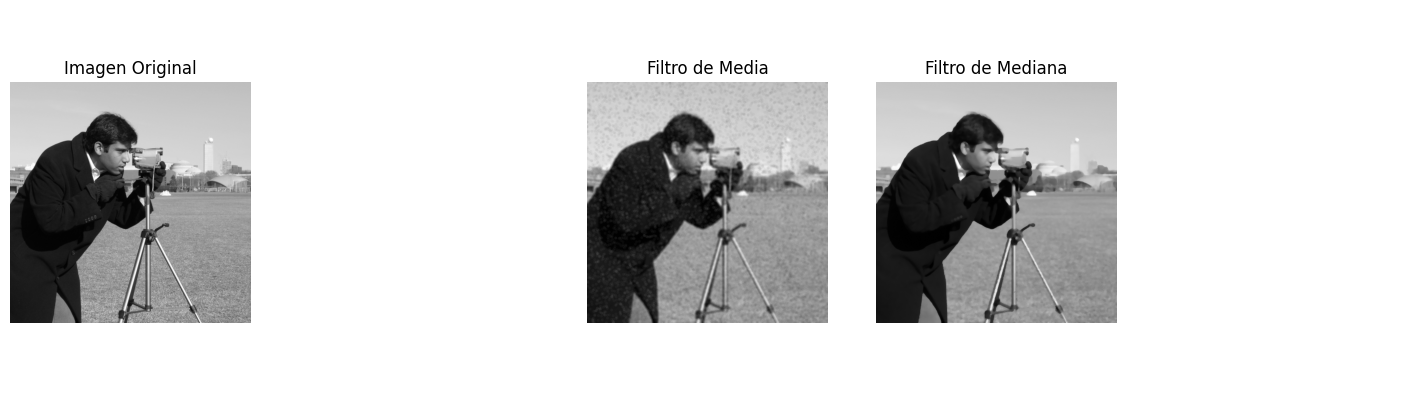

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import median
from skimage.morphology import disk
from skimage.data import camera
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.filters.rank import mean

# Cargar imagen de ejemplo (mejor contraste y detalles)
image = camera()

image_noisy = random_noise(image, mode='s&p', amount=0.05)  # Agregar ruido Sal y Pimienta

# Aplicar filtro de media (Promedio)
image_mean = mean((image_noisy * 255).astype(np.uint8), disk(3))

# Aplicar filtro de mediana
image_median = median(image_noisy, disk(3))

# Mostrar resultados
fig, ax = plt.subplots(1, 5, figsize=(18, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Imagen Original")
ax[2].imshow(image_mean, cmap='gray')
ax[2].set_title("Filtro de Media")
ax[3].imshow(image_median, cmap='gray')
ax[3].set_title("Filtro de Mediana")


for a in ax:
    a.axis("off")

plt.show()




✏️ Explicación:

Se agrega ruido sal y pimienta a la imagen original.

Se usa mean() para aplicar un filtro de media, que suaviza la imagen pero puede perder detalles.

Se usa median() para aplicar un filtro de mediana, que conserva bordes mejor y elimina ruido impulsivo.

**2️⃣ Filtros Convolucionales**

Los filtros convolucionales aplican una máscara (kernel) sobre la imagen para resaltar características específicas, como bordes o texturas. Algunos ejemplos:

* Filtro de Sobel: Detecta bordes en direcciones específicas.
* Filtro de Laplace: Detecta cambios abruptos en intensidad.

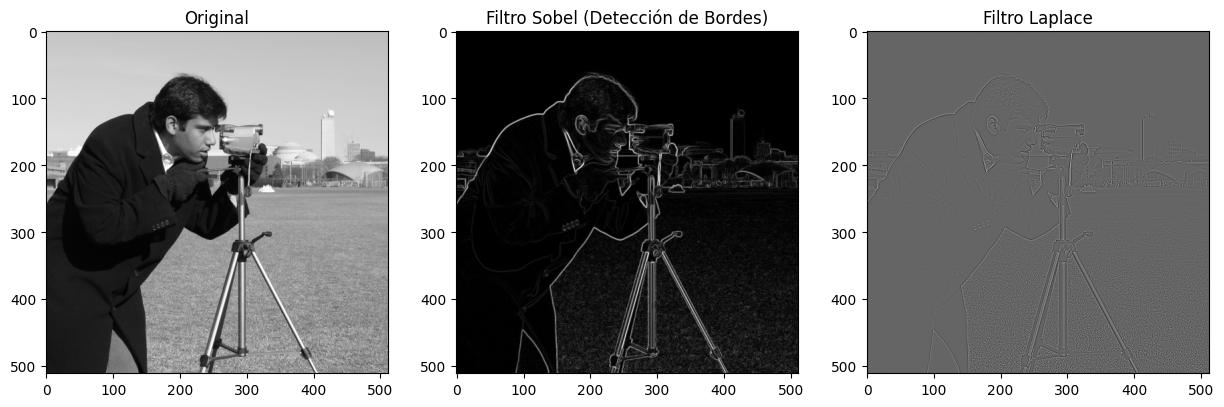

In [3]:
from skimage.filters import sobel, laplace

# Aplicar Filtro de Sobel
image_sobel = sobel(image)

# Aplicar Filtro de Laplace
image_laplace = laplace(image)

# Mostrar resultados
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(image_sobel, cmap='gray')
ax[1].set_title("Filtro Sobel (Detección de Bordes)")
ax[2].imshow(image_laplace, cmap='gray')
ax[2].set_title("Filtro Laplace")
plt.show()


✏️ Explicación:

sobel() resalta bordes horizontales y verticales.

laplace() detecta cambios abruptos en la imagen, útil para segmentación.

**3️⃣ Filtros Basados en Histogramas**

Los histogramas representan la distribución de intensidad de los píxeles en una imagen. La ecualización de histograma ajusta los valores para mejorar el contraste.

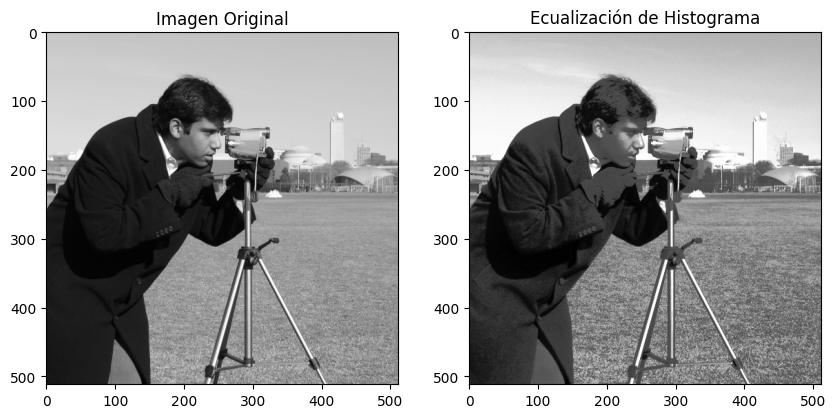

In [2]:
from skimage import exposure

# Aplicar Ecualización de Histograma
image_eq = exposure.equalize_hist(image)

# Mostrar resultados
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Imagen Original")
ax[1].imshow(image_eq, cmap='gray')
ax[1].set_title("Ecualización de Histograma")
plt.show()


✏️ Explicación:

*equalize_hist()* ajusta la distribución de intensidades para mejorar zonas oscuras y claras en la imagen.

Útil en imágenes subexpuestas o sobreexpuestas.


**🔹 Conclusión**

✅ Filtros simples eliminan ruido y mejoran calidad.

✅ Filtros convolucionales detectan bordes y texturas.

✅ Filtros basados en histogramas mejoran contraste.

✅ Estas técnicas son esenciales para preprocesamiento en Machine Learning.